In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use("ggplot")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 10)

<h2> 1. Загрузка данных </h2>

<b>1. Age </b> - возраст </br>
<b>2. Sex </b> - пол (1 - мужчина, 0 - женщина) </br>
<b>3. Cp </b> - тип боли в груди <u>(chest pain type)</u> </br>
<b>4. Trestbps </b> - артериальное давление в состоянии покоя (в мм. рт. столба при поступлении в стационар) </br>
<b>5. Chol </b> - холестерин сыворотки крови в мг/дл </br>
<b>6. Fbs </b> - уровень сахара в крови натощак > 120 мг / дл (1 = True; 0 = False) </br>
<b>7. Restecg </b> - электрокардиографические результаты в состоянии покоя </br>
<b>8. Thalach </b> - достигнутая максимальная частота сердечных сокращений </br>
<b>9. Exang </b> - стенокардия, вызванная физической нагрузкой (1 = True; 0 = False) </br>
<b>10. Oldpeak </b> - депрессия ST, вызванная физической нагрузкой относительно покоя </br>
<b>11. Slope </b> - наклон пика упражнения St сегмент </br>
<b>12. Ca </b> - количество крупных сосудов (0-3), окрашенных флуороскопией </br>
<b>13. Thal </b> - Талассемия (3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект) </br>
<b>14. Num </b> - прогнозируемое значение (это целое число, равное от 0 (отсутствие присутствия до 4) </br>

In [2]:
df1 = pd.read_csv(r"C:\Users\masal\Desktop\datasets\processed-hungarian.csv", encoding = "ISO-8859–1")
df1.head()

,28,1,2,130,132,0,2.1,185,0.1,0.2,?,?.1,?.2,0.3
0,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
1,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
2,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
3,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
4,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0


In [24]:
df1.shape

(293, 14)

In [3]:
df2 = pd.read_csv(r"C:\Users\masal\Desktop\datasets\processed-switzerland.csv", encoding = "ISO-8859–1")
df2.head()

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1


In [4]:
df3 = pd.read_csv(r"C:\Users\masal\Desktop\datasets\processed-va.csv", encoding = "ISO-8859–1")
df3.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [5]:
df4 = pd.read_csv(r"C:\Users\masal\Desktop\datasets\processed-cleveland.csv", encoding = "ISO-8859–1")
df4.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


<h2> 2. Обработка данных </h2>

In [6]:
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df1.columns = columns
df2.columns = columns
df3.columns = columns
df4.columns = columns

In [7]:
df1.head(), df1.shape, df2.shape, df3.shape, df4.shape

(   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
 0   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
 1   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
 2   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
 3   31    0   2      100  219   0       1     150     0      0.0     ?  ?   
 4   32    0   2      105  198   0       0     165     0      0.0     ?  ?   
 
   thal  num  
 0    ?    0  
 1    ?    0  
 2    6    0  
 3    ?    0  
 4    ?    0  ,
 (293, 14),
 (122, 14),
 (199, 14),
 (302, 14))

Склеим все данные в одну единую таблицу для очистки и проведения анализа

In [8]:
df = pd.concat([df1, df2, df3, df4], axis = 0, ignore_index = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29.0,1.0,2.0,120,243,0,0,160,0,0,?,?,?,0
1,29.0,1.0,2.0,140,?,0,0,170,0,0,?,?,?,0
2,30.0,0.0,1.0,170,237,0,1,170,0,0,?,?,6,0
3,31.0,0.0,2.0,100,219,0,1,150,0,0,?,?,?,0
4,32.0,0.0,2.0,105,198,0,0,165,0,0,?,?,?,0


In [30]:
df.shape

(916, 14)

Заменим знак вопроса на отсутствующие значения (np.nan)

In [9]:
df.replace("?", np.nan, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29.0,1.0,2.0,120,243,0,0,160,0,0,NaN,NaN,NaN,0
1,29.0,1.0,2.0,140,NaN,0,0,170,0,0,NaN,NaN,NaN,0
2,30.0,0.0,1.0,170,237,0,1,170,0,0,NaN,NaN,6,0
3,31.0,0.0,2.0,100,219,0,1,150,0,0,NaN,NaN,NaN,0
4,32.0,0.0,2.0,105,198,0,0,165,0,0,NaN,NaN,NaN,0


Поменяем у колонок sex и age тип данных с вещественного (float64) на целый (int32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    float64
 1   sex       916 non-null    float64
 2   cp        916 non-null    float64
 3   trestbps  857 non-null    object 
 4   chol      886 non-null    object 
 5   fbs       827 non-null    object 
 6   restecg   914 non-null    object 
 7   thalach   861 non-null    object 
 8   exang     861 non-null    object 
 9   oldpeak   854 non-null    object 
 10  slope     608 non-null    object 
 11  ca        308 non-null    object 
 12  thal      433 non-null    object 
 13  num       916 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.3+ KB


In [11]:
df["sex"] = df["sex"].astype('int32')
df["age"] = df["age"].astype("int32")

In [12]:
df.dtypes

age           int32
sex           int32
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num           int64
dtype: object

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29,1,2.0,120,243,0,0,160,0,0,NaN,NaN,NaN,0
1,29,1,2.0,140,NaN,0,0,170,0,0,NaN,NaN,NaN,0
2,30,0,1.0,170,237,0,1,170,0,0,NaN,NaN,6,0
3,31,0,2.0,100,219,0,1,150,0,0,NaN,NaN,NaN,0
4,32,0,2.0,105,198,0,0,165,0,0,NaN,NaN,NaN,0


Посмотрим процент пропущенных значений (если он будет больше 30, то признак необходимо отбросить)

In [14]:
percent_nun = np.round(df.isna().sum() * 100 / len(df), 2)
percent_nun

age          0.00
sex          0.00
cp           0.00
trestbps     6.44
chol         3.28
fbs          9.72
restecg      0.22
thalach      6.00
exang        6.00
oldpeak      6.77
slope       33.62
ca          66.38
thal        52.73
num          0.00
dtype: float64

Построим также тепловую карту отсутсвующих значений

<AxesSubplot:>

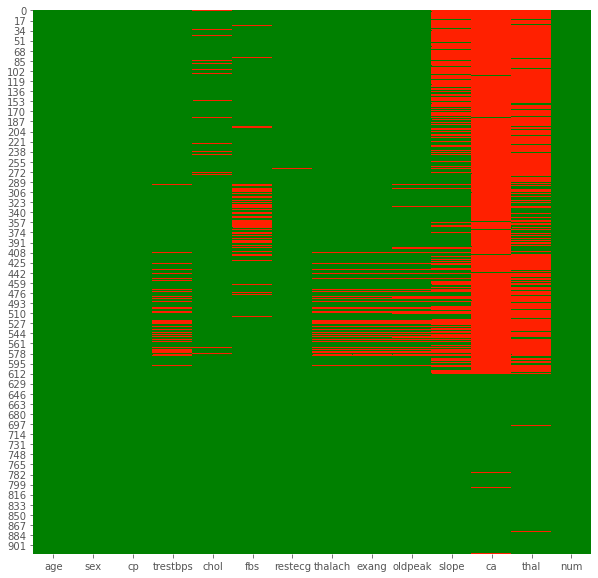

In [15]:
colors = ["#008000", "#ff2000"]

sns.heatmap(df.isna(), cmap = colors, cbar = False)

Как мы видим, признаки slope (наклон пика упражнения St сегмент), <br>
ca (количество крупных сосудов), thal (Талассемия) имеют более 30% пропущенных значений, при условии, что в таблице 916 строчек с данными. <br> То же самое показывает нам и тепловая карта
пропущенных значений. <br> Удалим эти признаки

In [16]:
df.drop(["slope", "ca", "thal"], axis = 1, inplace = True)

Теперь необходимо заполнить пропущенные значения, которые наблюдаются в остальных столбцах. Заполним их средним арифметическим значением. <br> Также перед этим поменяем типы данных у колонок, имеющих тип object, на int32

In [17]:
df.replace(np.nan, -999, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    int32  
 1   sex       916 non-null    int32  
 2   cp        916 non-null    float64
 3   trestbps  916 non-null    object 
 4   chol      916 non-null    object 
 5   fbs       916 non-null    object 
 6   restecg   916 non-null    object 
 7   thalach   916 non-null    object 
 8   exang     916 non-null    object 
 9   oldpeak   916 non-null    object 
 10  num       916 non-null    int64  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 71.7+ KB


In [19]:
df["oldpeak"] = df["oldpeak"].astype("float64")

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,29,1,2.0,120,243,0,0,160,0,0.0,0
1,29,1,2.0,140,-999,0,0,170,0,0.0,0
2,30,0,1.0,170,237,0,1,170,0,0.0,0
3,31,0,2.0,100,219,0,1,150,0,0.0,0
4,32,0,2.0,105,198,0,0,165,0,0.0,0


In [21]:
df.replace(-999, np.nan, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,29,1,2.0,120,243,0,0,160,0,0.0,0
1,29,1,2.0,140,NaN,0,0,170,0,0.0,0
2,30,0,1.0,170,237,0,1,170,0,0.0,0
3,31,0,2.0,100,219,0,1,150,0,0.0,0
4,32,0,2.0,105,198,0,0,165,0,0.0,0


In [22]:
df.fillna(value = df.mean(), inplace  = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,29,1,2.0,120,243,0,0,160,0,0.0,0
1,29,1,2.0,140,NaN,0,0,170,0,0.0,0
2,30,0,1.0,170,237,0,1,170,0,0.0,0
3,31,0,2.0,100,219,0,1,150,0,0.0,0
4,32,0,2.0,105,198,0,0,165,0,0.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    int32  
 1   sex       916 non-null    int32  
 2   cp        916 non-null    int32  
 3   trestbps  857 non-null    object 
 4   chol      886 non-null    object 
 5   fbs       827 non-null    object 
 6   restecg   914 non-null    object 
 7   thalach   861 non-null    object 
 8   exang     861 non-null    object 
 9   oldpeak   916 non-null    float64
 10  num       916 non-null    int64  
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 68.1+ KB


In [28]:
df.replace(np.nan, 99999, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,29,1,2,120,243,0,0,160,0,0.0,0
1,29,1,2,140,99999,0,0,170,0,0.0,0
2,30,0,1,170,237,0,1,170,0,0.0,0
3,31,0,2,100,219,0,1,150,0,0.0,0
4,32,0,2,105,198,0,0,165,0,0.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    int32  
 1   sex       916 non-null    int32  
 2   cp        916 non-null    int32  
 3   trestbps  916 non-null    object 
 4   chol      916 non-null    object 
 5   fbs       916 non-null    object 
 6   restecg   916 non-null    object 
 7   thalach   916 non-null    object 
 8   exang     916 non-null    object 
 9   oldpeak   916 non-null    float64
 10  num       916 non-null    int64  
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 68.1+ KB


In [30]:
for column in df.columns:
    if column != "oldpeak":
        df[column] = df[column].astype("int32")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,29,1,2,120,243,0,0,160,0,0.0,0
1,29,1,2,140,99999,0,0,170,0,0.0,0
2,30,0,1,170,237,0,1,170,0,0.0,0
3,31,0,2,100,219,0,1,150,0,0.0,0
4,32,0,2,105,198,0,0,165,0,0.0,0


In [36]:
df.replace(99999, np.nan, inplace = True)

In [37]:
df.fillna(value = df.mean(), inplace = True)

In [38]:
percent_nun = np.round(df.isna().sum() * 100 / len(df), 2)
percent_nun

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
num         0.0
dtype: float64

In [34]:
df.shape

(916, 11)

Отлично, мы избавились от отсутсвующих значений. Теперь попробуем разобраться с выбросами

In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,916.000000,916.00000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,53.541485,0.78821,3.255459,132.154026,199.323928,0.165659,0.601751,137.518002,0.390244,0.875878,0.996725
std,9.370073,0.40880,0.925783,18.436471,108.949821,0.353445,0.803705,25.124498,0.473192,1.052275,1.143760
min,29.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.00000,3.000000,120.000000,178.750000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.00000,4.000000,130.000000,221.000000,0.000000,0.000000,138.000000,0.000000,0.800000,1.000000
75%,60.000000,1.00000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000
max,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000


Понять по описательной статистике, есть ли выбросы, сложно. <br>Можно было бы воспользоваться параметрическим тестом Грабса, но учитывая, что в нашей таблице всего лишь 916 значений, говорить о нормальности распределения признаков не приходится (Тут даже наврятле из-за малого количества данных вступает в силу ЗБТ). <br>Также у нас есть большое количество дискретных переменных, которые могут подчиняться только дискретным распределениям. <br>
Попробуем построить ящики с усами для наших данных

ValueError: Could not interpret input 'sex'

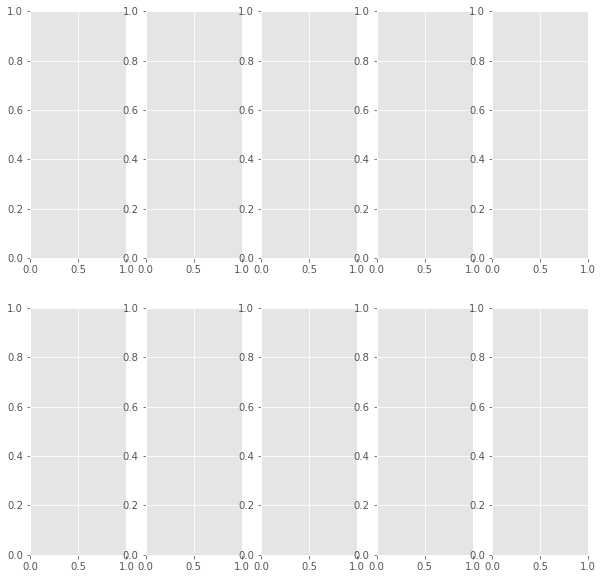

In [55]:
fig, axes = plt.subplots(2, 5, figsize = (10, 10))
z = 1

for i in range(2):
    for j in range(5):
        sns.boxplot(ax = axes[i, j], data = df.iloc[:, i])
        z += 1